## Roshan Thapa Magar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1: Data Preparation

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical

# Constants
img_height, img_width = 28, 28
num_classes = 10

# Load function
def load_images_from_folder(folder):
    images, labels = [], []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load data
x_train, y_train = load_images_from_folder("/content/drive/MyDrive/Worksheet_4/DevanagariHandwrittenDigitDataset/Train")
x_test, y_test = load_images_from_folder("/content/drive/MyDrive/Worksheet_4/DevanagariHandwrittenDigitDataset/Test")

# Reshape for FCN input (flatten)
x_train = x_train.reshape(-1, img_height * img_width)
x_test = x_test.reshape(-1, img_height * img_width)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Confirm shape
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)


Train shape: (17040, 784) (17040, 10)
Test shape: (3000, 784) (3000, 10)


Task 2: Build the FCN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(784,)),
    Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

batch_size = 128
epochs = 20

callbacks = [
    ModelCheckpoint("devnagari_best_model.h5", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=4)
]

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/20
 99/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6335 - loss: 1.4221

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6460 - loss: 1.3873 - val_accuracy: 0.0000e+00 - val_loss: 5.4953
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8974 - loss: 0.4865 - val_accuracy: 0.0000e+00 - val_loss: 6.3504
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.3287 - val_accuracy: 0.0000e+00 - val_loss: 6.8167
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9469 - loss: 0.2488 - val_accuracy: 0.0000e+00 - val_loss: 7.1243
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9543 - loss: 0.2083 - val_accuracy: 0.0000e+00 - val_loss: 7.4310


Task 5: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7610 - loss: 1.6359
Test Accuracy: 0.7610, Loss: 1.6359


Task 6: Save and Load the Model

In [ ]:
# Save the trained model
model.save("devnagari_model_final.h5")

# Load model later
from tensorflow.keras.models import load_model
loaded_model = load_model("devnagari_model_final.h5")

# Evaluate again to confirm
test_loss_loaded, test_acc_loaded = loaded_model.evaluate(x_test, y_test)
print(f"Loaded Model Accuracy: {test_acc_loaded:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9359 - loss: 0.3493
Loaded Model Accuracy: 0.7610


Task 7: Predictions

In [ ]:
import numpy as np

predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print(f"Prediction for first image: {predicted_labels[0]}")
print(f"True label for first image: {true_labels[0]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediction for first image: 0
True label for first image: 0


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Predicted': predicted_labels[:10],
    'Actual': true_labels[:10]
})

print(df)


   Predicted  Actual
0          0       0
1          0       0
2          0       0
3          0       0
4          0       0
5          0       0
6          0       0
7          0       0
8          0       0
9          0       0


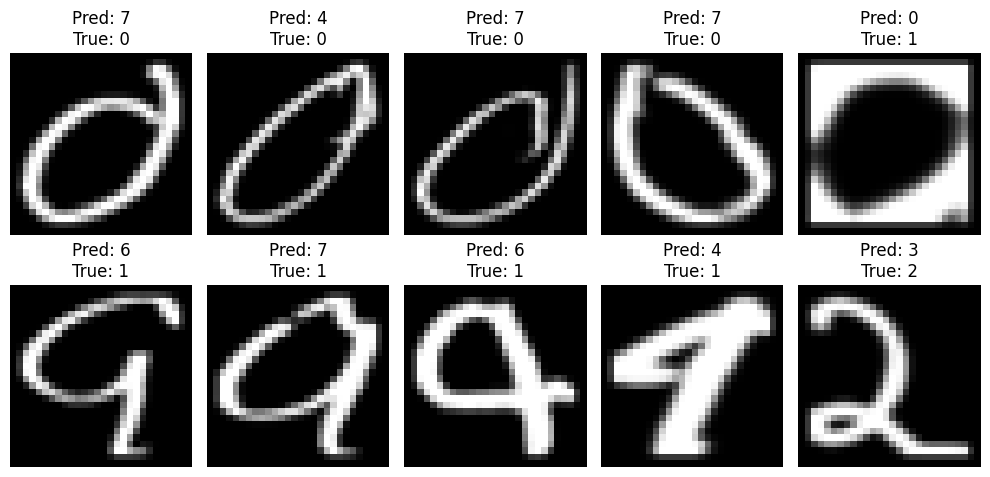

In [ ]:
import matplotlib.pyplot as plt

misclassified_indices = np.where(predicted_labels != true_labels)[0]

if len(misclassified_indices) > 0:
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {true_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified samples found!")
